In [85]:
import numpy as np
import pandas as pd
import nltk as nlt
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [86]:
file_path = "../../data/processed/facebook_preprocessed/posts_by_blocks_of_days.json"

with open(file_path, "r", encoding="utf-8") as file:
    json_data = json.load(file)



In [87]:
# Add block index to each post
processed = []
for block_index, block in enumerate(json_data):
    for post in block:
        post['block_index'] = block_index  # You can also add a date range or tag
        processed.append(post)

# Create DataFrame
df = pd.DataFrame(processed)

# Optional: Create datetime column
df["datetime"] = pd.to_datetime(df["date"] + " " + df["time"])

# Now you can group by 'block_index' to get back the structure
df.head()

,post_id,title,date,time,score,num_comments,flair,combined_text,comments,block_index,datetime
0,1jfx7j0,i read and summarized careless people a memoir...,2025-03-20,19:25:30,338,17,Discussion,i read and summarized careless people a memoir...,[],0,2025-03-20 19:25:30
1,1jg06st,as a small business owner i cannot believe how...,2025-03-20,21:28:51,217,55,Discussion,as a small business owner i cannot believe how...,[],0,2025-03-20 21:28:51
2,1jg86gj,mu boyfriends facebbok the dating heart app is...,2025-03-21,03:57:15,3,57,Discussion,mu boyfriends facebbok the dating heart app is...,[],0,2025-03-21 03:57:15
3,1jhtse9,why is my entire news feed fake news made of a...,2025-03-23,07:23:00,231,179,Discussion,why is my entire news feed fake news made of a...,[],0,2025-03-23 07:23:00
4,1jid2uf,life is better when you just leave meta why ar...,2025-03-23,23:34:14,1469,475,Discussion,life is better when you just leave meta why ar...,[],0,2025-03-23 23:34:14


# Sentiment over time

In [88]:
df['date'] = pd.to_datetime(df['date'])

# Group by date and sum the scores
daily_scores = df.groupby(df['date'].dt.date)['score'].sum().reset_index()

# Rename columns for clarity
daily_scores.columns = ['day', 'score']

print(daily_scores.head())


          day  score
0  2025-03-20    555
1  2025-03-21      3
2  2025-03-23   1700
3  2025-03-25    611
4  2025-03-26    566


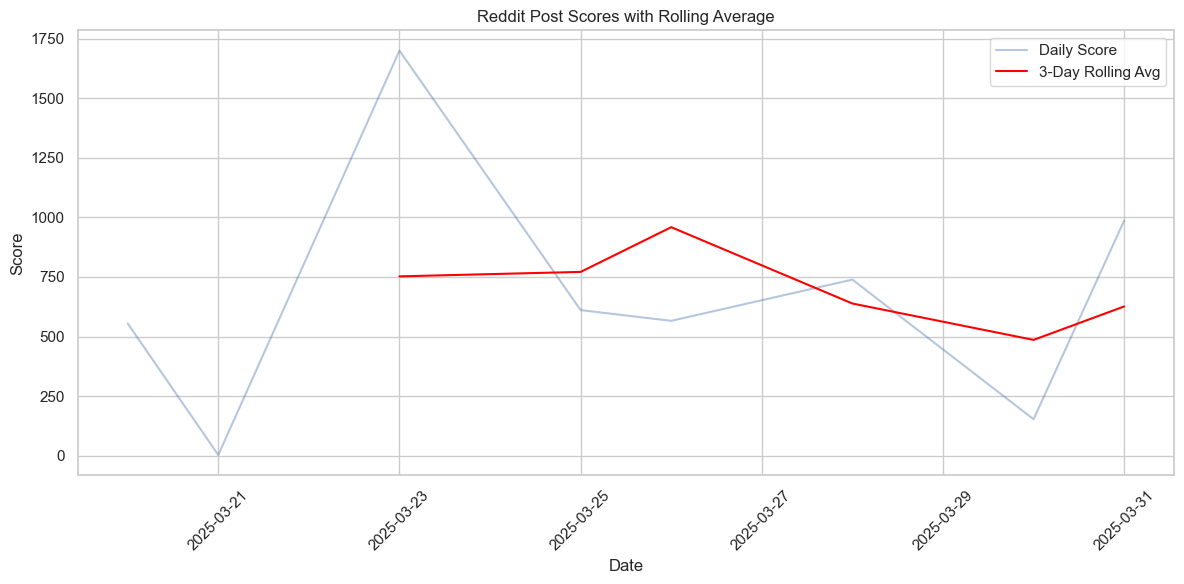

In [89]:
daily_scores['rolling_score'] = daily_scores['score'].rolling(window=3).mean()

plt.figure(figsize=(12, 6))
plt.plot(daily_scores['day'], daily_scores['score'], alpha=0.4, label='Daily Score')
plt.plot(daily_scores['day'], daily_scores['rolling_score'], color='red', label='3-Day Rolling Avg')
plt.title("Reddit Post Scores with Rolling Average")
plt.xlabel("Date")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Text Based Analysis

In [90]:
text = df["combined_text"]

In [91]:
from collections import Counter
import re

# Total character counts per post
character_count = list(map(lambda x:len(x),text))

df["character_count"] = character_count

# Total word count per post
word_counts = list(map(lambda s: len(s.split()), text))
df["Word_count"] = word_counts

# Seperated Words from total list
words = [word.lower() for t in text for word in re.findall(r'\b\w+\b', t)]
# df["Sepeated_words"] = words

# Sepeated words PER list
words_per_list = []
for t in text:
    words_per_list.append([text.lower() for text in re.findall(r'\b\w+\b', t)])

df["Seperated_List"] = words_per_list

# Frequncy of words in the entire dataframe
word_freq_counts = Counter(words)

In [92]:
# nlt.download('stopwords',download_dir="/src/EDA")
df.head()

,post_id,title,date,time,score,num_comments,flair,combined_text,comments,block_index,datetime,character_count,Word_count,Seperated_List
0,1jfx7j0,i read and summarized careless people a memoir...,2025-03-20,19:25:30,338,17,Discussion,i read and summarized careless people a memoir...,[],0,2025-03-20 19:25:30,17622,2779,"[i, read, and, summarized, careless, people, a..."
1,1jg06st,as a small business owner i cannot believe how...,2025-03-20,21:28:51,217,55,Discussion,as a small business owner i cannot believe how...,[],0,2025-03-20 21:28:51,862,162,"[as, a, small, business, owner, i, cannot, bel..."
2,1jg86gj,mu boyfriends facebbok the dating heart app is...,2025-03-21,03:57:15,3,57,Discussion,mu boyfriends facebbok the dating heart app is...,[],0,2025-03-21 03:57:15,295,59,"[mu, boyfriends, facebbok, the, dating, heart,..."
3,1jhtse9,why is my entire news feed fake news made of a...,2025-03-23,07:23:00,231,179,Discussion,why is my entire news feed fake news made of a...,[],0,2025-03-23 07:23:00,764,150,"[why, is, my, entire, news, feed, fake, news, ..."
4,1jid2uf,life is better when you just leave meta why ar...,2025-03-23,23:34:14,1469,475,Discussion,life is better when you just leave meta why ar...,[],0,2025-03-23 23:34:14,574,111,"[life, is, better, when, you, just, leave, met..."


In [93]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))  # Load English stopwords
words = [w for w in words if w not in stop_words]
print(words)
word_freq_counts = Counter(words)
most_common = word_freq_counts.most_common(20)  

common_words_df = pd.DataFrame(most_common, columns=['Word', 'Frequency'])
common_words_df.head()

['read', 'summarized', 'careless', 'people', 'memoir', 'facebook', 'doesnt', 'want', 'people', 'read', 'heres', 'summary', 'littler', 'books', '1', 'traumatic', 'shark', 'attack', 'childhood', 'instilled', 'sarah', 'author', 'sense', 'purpose', 'drive', 'make', 'difference', 'world', '2', 'sarah', 'becomes', 'diplomat', 'un', 'grows', 'disillusioned', 'ineffectiveness', 'comes', 'believe', 'facebook', 'revolutionary', 'platform', 'wants', 'center', '3', 'sarahs', 'family', 'goes', 'christchurch', 'earthquake', 'experiences', 'crucial', 'role', 'facebook', 'disaster', 'communication', 'community', 'support', '4', 'following', 'initial', 'rejection', 'facebook', 'executives', 'sarah', 'successfully', 'persuades', 'company', 'create', 'manager', 'global', 'public', 'policy', 'position', 'aftermath', 'christchurch', 'earthquake', '5', 'sarah', 'forgets', 'bring', 'laptop', 'first', 'day', 'expects', 'facebook', 'computers', 'office', '6', 'sarah', 'meeting', 'new', 'zealand', 'prime', 'min

,Word,Frequency
0,facebook,59
1,sarah,33
2,mark,26
3,facebooks,21
4,1,16


In [94]:
from nltk.util import ngrams

# Generate unigrams, bigrams, trigrams
unigrams = list(ngrams(words, 1))
bigrams = list(ngrams(words, 2))
trigrams = list(ngrams(words, 3))

# Count most common n-grams

grams_df = pd.DataFrame()
grams_df["bigrams"] = Counter(bigrams).most_common(20)
grams_df["trigrams"] = Counter(trigrams).most_common(20)
grams_df.head()


,bigrams,trigrams
0,"((prime, minister), 4)","((trip, asia, mark), 2)"
1,"((facebook, employees), 4)","((facebooks, role, spreading), 2)"
2,"((chinese, government), 4)","((role, spreading, misinformation), 2)"
3,"((facebook, executives), 3)","((facebook, employees, responsible), 2)"
4,"((using, facebook), 3)","((enter, chinese, market), 2)"


In [95]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

sent = df['combined_text'].apply(lambda post: sia.polarity_scores(post)['compound'])
df["Sentiment"] = sent
print(sent)

0    -0.9988
1    -0.8125
2     0.0000
3    -0.9406
4     0.0726
5     0.9113
6    -0.9028
7     0.9166
8     0.1027
9    -0.8371
10    0.2319
11    0.7539
Name: combined_text, dtype: float64


In [96]:
df.head()

,post_id,title,date,time,score,num_comments,flair,combined_text,comments,block_index,datetime,character_count,Word_count,Seperated_List,Sentiment
0,1jfx7j0,i read and summarized careless people a memoir...,2025-03-20,19:25:30,338,17,Discussion,i read and summarized careless people a memoir...,[],0,2025-03-20 19:25:30,17622,2779,"[i, read, and, summarized, careless, people, a...",-0.9988
1,1jg06st,as a small business owner i cannot believe how...,2025-03-20,21:28:51,217,55,Discussion,as a small business owner i cannot believe how...,[],0,2025-03-20 21:28:51,862,162,"[as, a, small, business, owner, i, cannot, bel...",-0.8125
2,1jg86gj,mu boyfriends facebbok the dating heart app is...,2025-03-21,03:57:15,3,57,Discussion,mu boyfriends facebbok the dating heart app is...,[],0,2025-03-21 03:57:15,295,59,"[mu, boyfriends, facebbok, the, dating, heart,...",0.0000
3,1jhtse9,why is my entire news feed fake news made of a...,2025-03-23,07:23:00,231,179,Discussion,why is my entire news feed fake news made of a...,[],0,2025-03-23 07:23:00,764,150,"[why, is, my, entire, news, feed, fake, news, ...",-0.9406
4,1jid2uf,life is better when you just leave meta why ar...,2025-03-23,23:34:14,1469,475,Discussion,life is better when you just leave meta why ar...,[],0,2025-03-23 23:34:14,574,111,"[life, is, better, when, you, just, leave, met...",0.0726


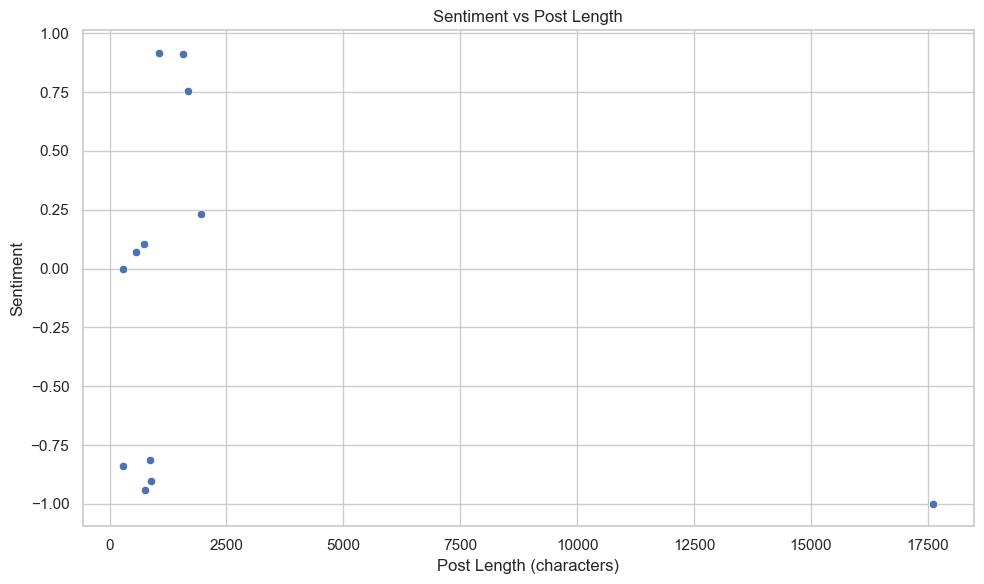

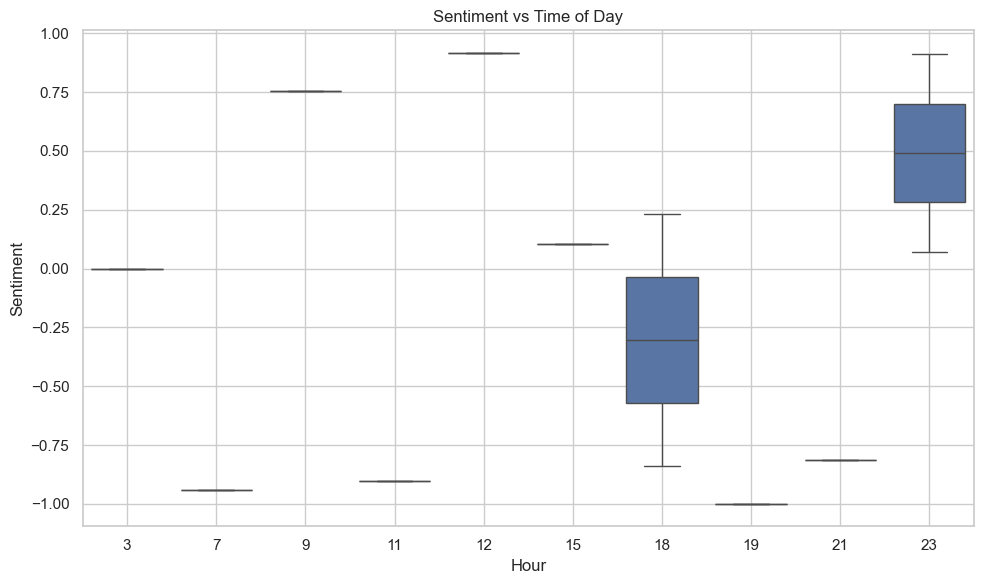

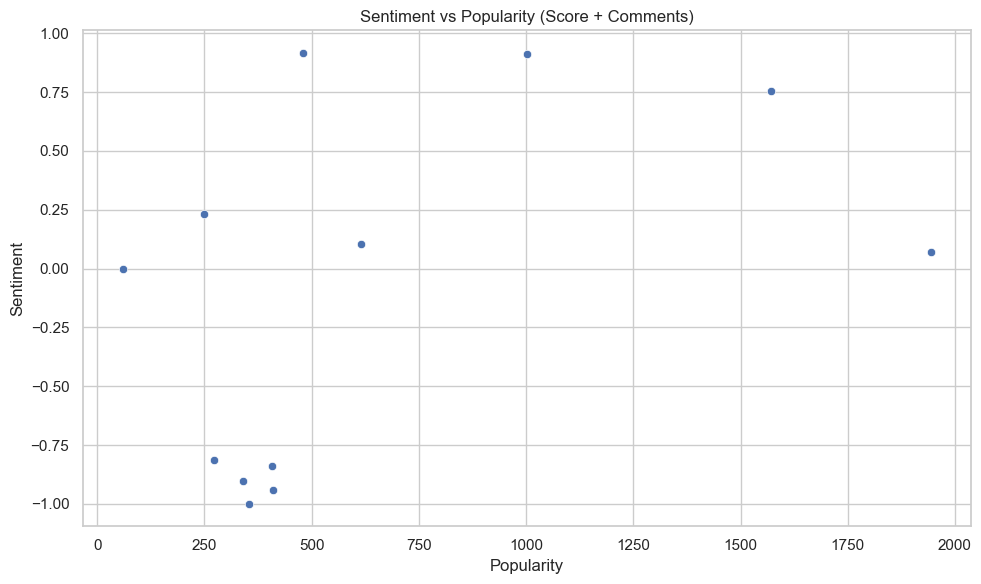


=== Correlations ===
             post_length      hour  popularity  Sentiment
post_length     1.000000  0.217925   -0.135734  -0.308290
hour            0.217925  1.000000    0.315976   0.017184
popularity     -0.135734  0.315976    1.000000   0.455600
Sentiment      -0.308290  0.017184    0.455600   1.000000


In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure these columns exist — adjust as needed
if 'body' not in df.columns and 'combined_text' in df.columns:
    df['body'] = df['combined_text']

# Create post length column
df['post_length'] = df['body'].apply(len)

# Extract hour from the 'time' column
df['hour'] = pd.to_datetime(df['time'], format='%H:%M:%S', errors='coerce').dt.hour

# Compute popularity metric
df['popularity'] = df['score'] + df['num_comments']

# --- Plot: Sentiment vs Post Length ---
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='post_length', y='Sentiment')
plt.title('Sentiment vs Post Length')
plt.xlabel('Post Length (characters)')
plt.ylabel('Sentiment')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Plot: Sentiment vs Hour of Day ---
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='hour', y='Sentiment')
plt.title('Sentiment vs Time of Day')
plt.xlabel('Hour')
plt.ylabel('Sentiment')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Plot: Sentiment vs Popularity ---
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='popularity', y='Sentiment')
plt.title('Sentiment vs Popularity (Score + Comments)')
plt.xlabel('Popularity')
plt.ylabel('Sentiment')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Correlation Analysis ---
correlations = df[['post_length', 'hour', 'popularity', 'Sentiment']].corr()
print("\n=== Correlations ===")
print(correlations)


In [110]:
relevant_columns = ['date', 'score', 'num_comments', 'flair','character_count','Word_count', 'Sentiment','post_length','hour', "popularity","block_index"]
new_df = df[relevant_columns]
new_df.head()

,date,score,num_comments,flair,character_count,Word_count,Sentiment,post_length,hour,popularity,block_index
0,2025-03-20,338,17,Discussion,17622,2779,-0.9988,17622,19,355,0
1,2025-03-20,217,55,Discussion,862,162,-0.8125,862,21,272,0
2,2025-03-21,3,57,Discussion,295,59,0.0000,295,3,60,0
3,2025-03-23,231,179,Discussion,764,150,-0.9406,764,7,410,0
4,2025-03-23,1469,475,Discussion,574,111,0.0726,574,23,1944,0


In [99]:
sentiment_vs_date = new_df[['date', 'Sentiment']]

# Filter for year 2025
sentiment_vs_date_2025 = sentiment_vs_date[sentiment_vs_date['date'].dt.year == 2025]


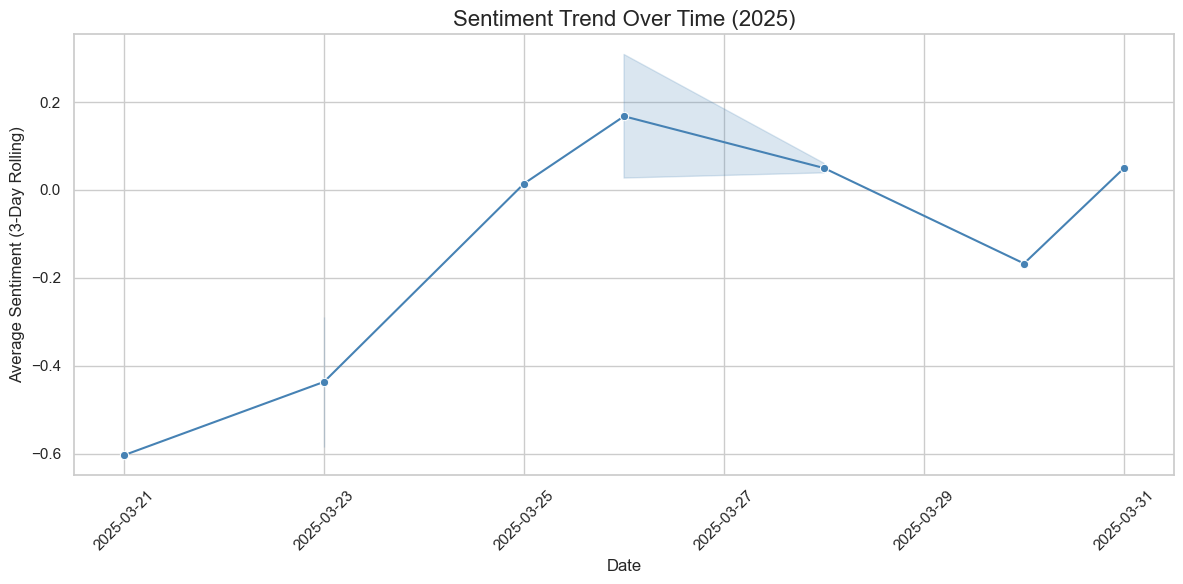

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort by date
sentiment_vs_date_2025 = sentiment_vs_date_2025.sort_values("date")

# Apply a 3-day rolling average for smoothing
sentiment_vs_date_2025['Smoothed Sentiment'] = sentiment_vs_date_2025['Sentiment'].rolling(window=3).mean()

# Set style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=sentiment_vs_date_2025, x='date', y='Smoothed Sentiment', marker='o', color='steelblue')
plt.title('Sentiment Trend Over Time (2025)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Average Sentiment (3-Day Rolling)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [103]:
new_df.head()

,date,score,num_comments,flair,character_count,Word_count,Sentiment,post_length,hour,popularity
0,2025-03-20,338,17,Discussion,17622,2779,-0.9988,17622,19,355
1,2025-03-20,217,55,Discussion,862,162,-0.8125,862,21,272
2,2025-03-21,3,57,Discussion,295,59,0.0000,295,3,60
3,2025-03-23,231,179,Discussion,764,150,-0.9406,764,7,410
4,2025-03-23,1469,475,Discussion,574,111,0.0726,574,23,1944


In [116]:
new_df.head()

,date,score,num_comments,flair,character_count,Word_count,Sentiment,post_length,hour,popularity,block_index
0,2025-03-20,338,17,Discussion,17622,2779,-0.9988,17622,19,355,0
1,2025-03-20,217,55,Discussion,862,162,-0.8125,862,21,272,0
2,2025-03-21,3,57,Discussion,295,59,0.0000,295,3,60,0
3,2025-03-23,231,179,Discussion,764,150,-0.9406,764,7,410,0
4,2025-03-23,1469,475,Discussion,574,111,0.0726,574,23,1944,0


In [120]:
stop_words = set(stopwords.words('english'))
exportDF = pd.DataFrame()
exportDF["date"] = new_df["date"]
exportDF["company"] = "Facebook"

# Senetiment from 3 days wala

#avg_sentiment
#num_commnets
#num_posts
#most_commonword

sum = 0

for index, row in new_df.iterrows():
    sum+=row["hour"]

print(sum)


exportDF.head()

179


,date,company
0,2025-03-20,Facebook
1,2025-03-20,Facebook
2,2025-03-21,Facebook
3,2025-03-23,Facebook
4,2025-03-23,Facebook
